<a href="https://colab.research.google.com/github/Allin-13/MachineLearning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entropy: 0.9852281360342515
IG(StudyHours): 0.3059584928680418
IG(Attendance): 0.12808527889139443

Decision Tree (Dictionary Form):
{'StudyHours': {'Low': {'Attendance': {'Low': 'Fail', 'High': 'Fail'}}, 'High': 'Pass', 'Medium': {'Attendance': {'Low': 'Fail', 'High': 'Pass'}}}}

Prediction for {'StudyHours': 'Low', 'Attendance': 'High'} : Fail


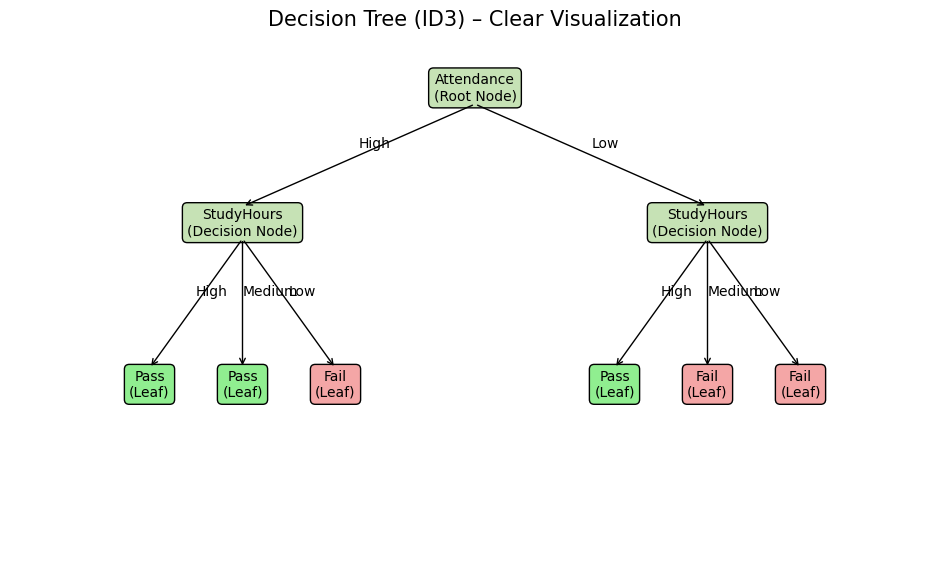

In [2]:
# FULL ID3 DECISION TREE CODE
# WITH FLOWCHART-STYLE VISUALIZATION
# ===============================

import math
from collections import Counter
import matplotlib.pyplot as plt

# -------------------------------
# Dataset
# -------------------------------
data = [
    {"StudyHours": "High",   "Attendance": "High", "Result": "Pass"},
    {"StudyHours": "High",   "Attendance": "Low",  "Result": "Pass"},
    {"StudyHours": "Medium", "Attendance": "High", "Result": "Pass"},
    {"StudyHours": "Low",    "Attendance": "High", "Result": "Pass"},
    {"StudyHours": "Low",    "Attendance": "Low",  "Result": "Fail"},
    {"StudyHours": "Medium", "Attendance": "Low",  "Result": "Fail"},
    {"StudyHours": "Low",    "Attendance": "High", "Result": "Fail"},
]

# -------------------------------
# Entropy
# -------------------------------
def entropy(dataset):
    counts = Counter(row["Result"] for row in dataset)
    total = len(dataset)
    ent = 0
    for c in counts.values():
        p = c / total
        ent -= p * math.log2(p)
    return ent

# -------------------------------
# Information Gain
# -------------------------------
def information_gain(dataset, attribute):
    total_entropy = entropy(dataset)
    total = len(dataset)
    weighted_entropy = 0

    for value in set(row[attribute] for row in dataset):
        subset = [row for row in dataset if row[attribute] == value]
        weighted_entropy += (len(subset) / total) * entropy(subset)

    return total_entropy - weighted_entropy

# -------------------------------
# Build ID3 Tree
# -------------------------------
def build_tree(dataset, attributes, parent_majority=None):
    results = [row["Result"] for row in dataset]
    counts = Counter(results)

    if len(counts) == 1:
        return results[0]

    if not attributes:
        return parent_majority

    current_majority = counts.most_common(1)[0][0]
    best_attr = max(attributes, key=lambda a: information_gain(dataset, a))
    tree = {best_attr: {}}

    remaining_attrs = [a for a in attributes if a != best_attr]

    for value in set(row[best_attr] for row in dataset):
        subset = [row for row in dataset if row[best_attr] == value]
        if not subset:
            tree[best_attr][value] = current_majority
        else:
            tree[best_attr][value] = build_tree(subset, remaining_attrs, current_majority)

    return tree

# -------------------------------
# Prediction
# -------------------------------
def predict(tree, sample):
    if isinstance(tree, str):
        return tree
    attribute = next(iter(tree))
    value = sample[attribute]
    return predict(tree[attribute][value], sample)

# -------------------------------
# Visualization (Flowchart Style)
# -------------------------------
def visualize_tree():
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.set_title("Decision Tree (ID3) – Clear Visualization", fontsize=15)
    ax.axis('off')

    def draw_box(x, y, text, fc):
        ax.text(x, y, text, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.35", fc=fc))

    def draw_arrow(x1, y1, x2, y2, label=None):
        ax.annotate("", xy=(x2, y2), xytext=(x1, y1),
                    arrowprops=dict(arrowstyle="->"))
        if label:
            ax.text((x1+x2)/2, (y1+y2)/2 + 0.015, label, fontsize=10)

    # Root
    draw_box(0.5, 0.9, "Attendance\n(Root Node)", "#c6e2b5")

    # Decision nodes
    draw_box(0.25, 0.65, "StudyHours\n(Decision Node)", "#c6e2b5")
    draw_box(0.75, 0.65, "StudyHours\n(Decision Node)", "#c6e2b5")

    draw_arrow(0.5, 0.87, 0.25, 0.68, "High")
    draw_arrow(0.5, 0.87, 0.75, 0.68, "Low")

    # Leaves (Attendance = High)
    draw_box(0.15, 0.35, "Pass\n(Leaf)", "#90ee90")
    draw_box(0.25, 0.35, "Pass\n(Leaf)", "#90ee90")
    draw_box(0.35, 0.35, "Fail\n(Leaf)", "#f4a6a6")

    draw_arrow(0.25, 0.62, 0.15, 0.38, "High")
    draw_arrow(0.25, 0.62, 0.25, 0.38, "Medium")
    draw_arrow(0.25, 0.62, 0.35, 0.38, "Low")

    # Leaves (Attendance = Low)
    draw_box(0.65, 0.35, "Pass\n(Leaf)", "#90ee90")
    draw_box(0.75, 0.35, "Fail\n(Leaf)", "#f4a6a6")
    draw_box(0.85, 0.35, "Fail\n(Leaf)", "#f4a6a6")

    draw_arrow(0.75, 0.62, 0.65, 0.38, "High")
    draw_arrow(0.75, 0.62, 0.75, 0.38, "Medium")
    draw_arrow(0.75, 0.62, 0.85, 0.38, "Low")

    plt.show()


# -------------------------------
# Execution
# -------------------------------
attributes = ["StudyHours", "Attendance"]

print("Entropy:", entropy(data))
print("IG(StudyHours):", information_gain(data, "StudyHours"))
print("IG(Attendance):", information_gain(data, "Attendance"))

tree = build_tree(data, attributes)
print("\nDecision Tree (Dictionary Form):")
print(tree)

sample = {"StudyHours": "Low", "Attendance": "High"}
print("\nPrediction for", sample, ":", predict(tree, sample))

# Visual Output
visualize_tree()